In [1]:
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import font_manager,rc

plt.rc("font", family = "Malgun gothic")

In [2]:
credentials = service_account.Credentials.from_service_account_file("./teamproject_key.json")

In [3]:
client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [4]:
age = """
SELECT
    *
FROM
    `teamproject-428905.kim.dui_accident_age`
"""

In [5]:
age_df = client.query(age).to_dataframe()

C:\Users\rlawn\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [7]:
age_df = age_df.set_index("age")

In [8]:
age_df

,accident
age,
20세이하,8055
21-30세,96502
31-40세,107417
41-50세,107771
51-60세,63639
61세 이상,24301


(-1.0999923503446356,
 1.0999990853665544,
 -1.099999411768229,
 1.099999971564542)

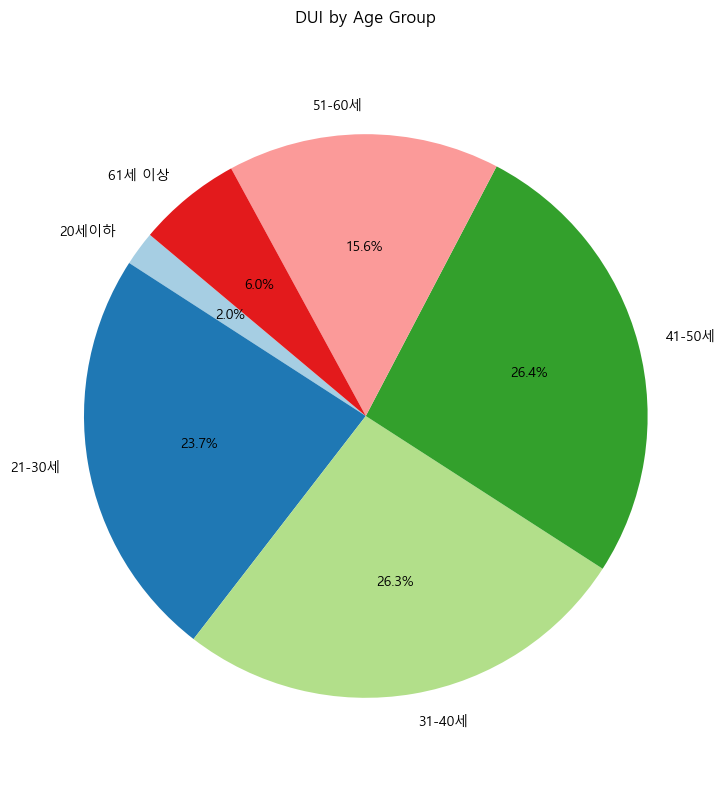

In [9]:
plt.figure(figsize=(8, 10))
plt.pie(age_df['accident'], labels = age_df.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('DUI by Age Group')
plt.axis('equal')